# Question 1:

In [61]:
class KNN:
    def __init__(self, k=5):
        self.k = k
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train  
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = []
            for i, x_train in enumerate(self.X_train):
                distance = self._euclidean_distance(x, x_train)
                distances.append((distance, self.y_train[i]))
            distances.sort()
            k_nearest = distances[:self.k]
            k_nearest_labels = [label for _, label in k_nearest]
            y_pred.append(max(set(k_nearest_labels), key=k_nearest_labels.count))
        return y_pred
    def _euclidean_distance(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance += (x1[i] - x2[i])**2
        return (distance*distance)
X = np.array([[2.0, 3.0], [4.0, 6.0], [1.0, 8.0], [7.0, 4.0], [5.0, 5.0]])
y = np.array([0, 0, 1, 1, 1])
knn = KNN()
knn.fit(X, y)
x1 = float(input("Enter value for x1: "))
x2 = float(input("Enter value for x2: "))
x_new = np.array([[x1, x2]])
y_pred = knn.predict(x_new)
print("Predicted class label:", y_pred)

Enter value for x1: 6.0
Enter value for x2: 4.0
Predicted class label: [1]


# Question 2

In [1]:
import pandas as pd
df=pd.read_csv('fruit_data_with_colors _1_.csv')


In [2]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
5,2,mandarin,mandarin,80.0,5.8,4.3,0.77
6,2,mandarin,mandarin,80.0,5.9,4.3,0.81
7,2,mandarin,mandarin,76.0,5.8,4.0,0.81
8,1,apple,braeburn,178.0,7.1,7.8,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89


In [3]:
df=df.select_dtypes(include=[float,int])
df

,fruit_label,mass,width,height,color_score
0,1,192.0,8.4,7.3,0.55
1,1,180.0,8.0,6.8,0.59
2,1,176.0,7.4,7.2,0.60
3,2,86.0,6.2,4.7,0.80
4,2,84.0,6.0,4.6,0.79
5,2,80.0,5.8,4.3,0.77
6,2,80.0,5.9,4.3,0.81
7,2,76.0,5.8,4.0,0.81
8,1,178.0,7.1,7.8,0.92
9,1,172.0,7.4,7.0,0.89


In [4]:
df=df.fillna(df.mean())
df

,fruit_label,mass,width,height,color_score
0,1,192.000000,8.4,7.300000,0.55
1,1,180.000000,8.0,6.800000,0.59
2,1,176.000000,7.4,7.200000,0.60
3,2,86.000000,6.2,4.700000,0.80
4,2,84.000000,6.0,4.600000,0.79
5,2,80.000000,5.8,4.300000,0.77
6,2,80.000000,5.9,4.300000,0.81
7,2,76.000000,5.8,4.000000,0.81
8,1,178.000000,7.1,7.800000,0.92
9,1,172.000000,7.4,7.000000,0.89


In [5]:
import numpy as np
train_data=df[:31]
test_data=df[31:]

In [6]:
print(train_data)
print('\n')
print(test_data)

    fruit_label         mass  width    height  color_score
0             1   192.000000    8.4  7.300000         0.55
1             1   180.000000    8.0  6.800000         0.59
2             1   176.000000    7.4  7.200000         0.60
3             2    86.000000    6.2  4.700000         0.80
4             2    84.000000    6.0  4.600000         0.79
5             2    80.000000    5.8  4.300000         0.77
6             2    80.000000    5.9  4.300000         0.81
7             2    76.000000    5.8  4.000000         0.81
8             1   178.000000    7.1  7.800000         0.92
9             1   172.000000    7.4  7.000000         0.89
10            1   166.000000    6.9  7.300000         0.93
11            1   172.000000    7.1  7.600000         0.92
12            1   154.000000    7.0  7.100000         0.88
13            1   164.000000    7.3  7.700000         0.70
14            1   152.000000    7.6  7.300000         0.69
15            1   156.000000    7.7  7.100000         0.

In [7]:
print(f'Training Data Set Shape:{train_data.shape}')
print(f'Testing Data Set Shape:{test_data.shape}')

Training Data Set Shape:(31, 5)
Testing Data Set Shape:(29, 5)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
df=pd.read_csv('fruit_data_with_colors _1_.csv')
df=df.fillna(df.mean())
x=df.iloc[:,3:7].values
y=df.iloc[:,0].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
for k in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f'K={k},Accuracy={accuracy}')


K=1,Accuracy=0.8888888888888888
K=2,Accuracy=0.9444444444444444
K=3,Accuracy=0.8888888888888888
K=4,Accuracy=0.9444444444444444
K=5,Accuracy=0.9444444444444444
K=6,Accuracy=0.9444444444444444
K=7,Accuracy=0.8333333333333334
K=8,Accuracy=0.8333333333333334
K=9,Accuracy=0.8333333333333334
K=10,Accuracy=0.7222222222222222


/tmp/ipykernel_30438/3423662148.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())
/home/spoofydesk/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/spoofydesk/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurt

In [23]:
import matplotlib.pyplot as plt

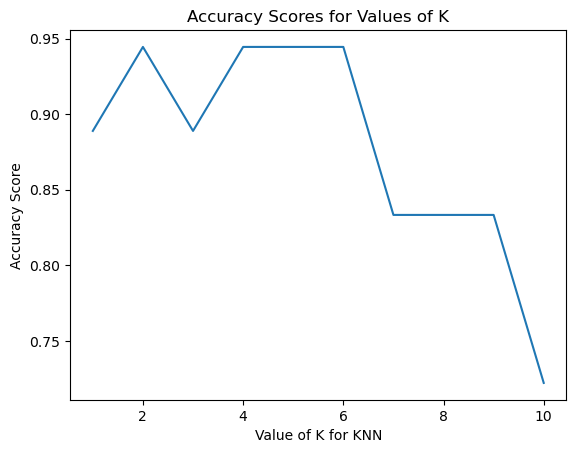

In [13]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of K')
plt.show()
